# CHAPTER - 17: Support Vector Machines

Support Vector Machine: SVM is a learning problem where we try to find a hyperplane that best seperates the two classes. (Hyperplane that maximizes the margins between the classes)

***Both logistic regression and SVM try to find the best hyperplane, but logistic regression is a probabilistic approach whereas SVM is a statistical approach.***

SVM works best when the dataset is small and complex.

Hyperplane: It is an n-1 subspace in an n-dimensional space. (if we want a two-dimensional space, we will use a one-dimensional hyperplane)

## 17.1 Training a Linear Classifier

Training a model to classify obserations.

In [1]:
# loading the libraries

from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# loading data with only two classes and two features

iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

In [3]:
# Standardize features

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [4]:
# creating support vector classifier

svc = LinearSVC(C = 1.0)

In [5]:
# training the model

model = svc.fit(features_standardized, target)

SVC's work well in high dimensions, we only loaded two features and took a subset of observations so that data has only two classes. So that we can visualize the model.

In [6]:
# Plotting 2 classes on a 2-dimensional space
from matplotlib import pyplot as plt

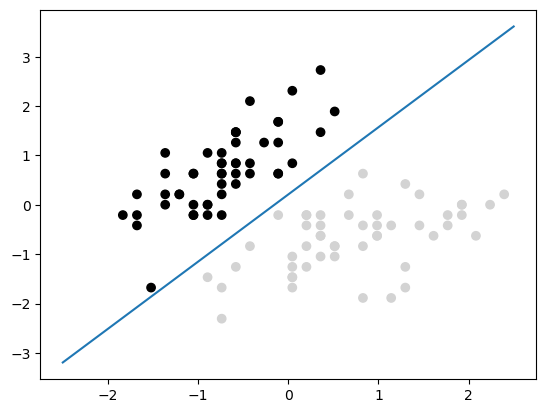

In [16]:
# Plotting data points and coloring using their class

color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c = color)

# creating the hyperplane

w = svc.coef_[0]
a = -w[0] /w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) /w[1]

# plotting the hyperplane

plt.plot(xx, yy)
# plt.axis("off")
plt.show()

Observations of class 0 are black and observations of class 1 are light gray. The observations above hyperplane are classified as class 0 and below are as class 1, we can prove this by creating a new observation

In [17]:
# creating a new observation

new_observation = [[-2, 4]]

svc.predict(new_observation)

array([0])

In [18]:
new_observation = [[1, -2]]

svc.predict(new_observation)

array([1])

1. For the sake of visualization we took only two classes but SVC work well with multiple classes.
2. Here the data is linearly seperable, means the hyperplane can perfectly separate two classes. Hyperplane is by definition linear(i.e., not curved)

In real world cases we can rarely separate the classes, in those situations SVC maximizes the margin of hyperplane and minimizes the misclassification.

## 17.2 Handling Linearly Inseparable Classes Using Kernels

Training extension of support vector machines using kernel functions to create nonlinear decision boundaries:

In [40]:
# loading libraries

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [41]:
# set randomization seed

np.random.seed(0)

In [42]:
# generating 2 features

features = np.random.randn(200, 2)

In [43]:
# using XOR gate to generate linearly inseparable classes

target_xor = np.logical_xor(features[:,0] > 0, features[:,1] > 0)
target = np.where(target_xor, 0, 1)

In [44]:
# Creating a SVM with radial basis function kernel

svc = SVC(kernel = "rbf", random_state = 0, gamma = 1, C = 1)

In [45]:
# Training the classifier

model = svc.fit(features, target)

In [46]:
# Plotting observations and decision boundary hyperplane

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [71]:
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(['r', 'g', 'b'])
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.1, cmap = cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = cmap(idx),
                    marker = "+", label =cl)

In [72]:
# create a SVC with a linear kernel

svc_linear = SVC(kernel = "linear", random_state = 0, C = 1)

In [73]:
# train the model

svc_linear.fit(features, target)

SVC(C=1, kernel='linear', random_state=0)

C:\Users\HP\AppData\Local\Temp\ipykernel_26116\2834836206.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],


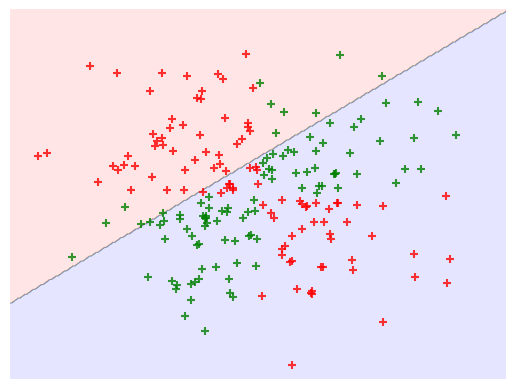

In [78]:
# plotting observations and hyperplane

plot_decision_regions(features, target, classifier = svc_linear)
plt.axis("off")
plt.show()

As we can see linear hyperplane poorly divided the classes, using RBF kernel function instead of linear to train the model

In [75]:
# creating support vector machine with radial basis function

svc = SVC(kernel = "rbf", random_state = 0, gamma = 1, C = 1)

In [76]:
# training the classifier

model = svc.fit(features, target)

C:\Users\HP\AppData\Local\Temp\ipykernel_26116\2834836206.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],


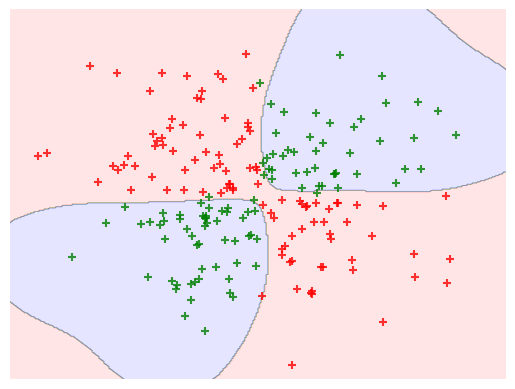

In [79]:
# visualizing the observations and hyperplane

plot_decision_regions(features, target, classifier = svc)
plt.axis("off")
plt.show()

We can see that RBF kernel did a better job in dividing the classes, we can select any kernel we want. After selecting the kernel we need to specify appropriate options such as values of degree when selecting polynomial kernel, and value of gamma when selecting RBF kernel.

## 17.3 Creating Predicted Probabilities

To know the predicted class probabilities for an observation.

We can find these probabilities by setting "probability = True" while using SVC and then by using predict_proba we can get calibrated probabilities.

In [80]:
# loading libraries

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [81]:
# loading the data

iris = datasets.load_iris()
features = iris.data
target = iris.target

In [82]:
# Standardizing the features

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [83]:
# Creating SVC object

svc = SVC(kernel = "linear", probability = True, random_state = 0)

In [84]:
model = svc.fit(features_standardized, target)

In [85]:
# creating a new observation

new_observation = [[0.4, 0.4, 0.4, 0.4]]

In [86]:
# view predicted probabilities

model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

## 17.4 Identifying Support Vectors

Identifying which observations are the support vectors of the decision hyperplane.

In [87]:
# Loading the libraries

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [88]:
# loading data with only two classes

iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

In [89]:
# Standardizing features

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [90]:
# create support vector classifier object

svc = SVC(kernel = "linear", random_state = 0)

In [91]:
# train classifier

model = svc.fit(features_standardized, target)

In [92]:
# view support vectors

model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

Support Vecotrs are a small number of observations which determine the hyperplane.

If we remove an observation that is not a support vector from the data, the model does not change, however if we remove a support vector the hyperplane will not have the maximum margin.

we can view the indices of the support vectors using support_ and n_support_ to find the number of support vectors belonging to each class.

In [93]:
model.support_

array([23, 41, 57, 98])

In [94]:
model.n_support_

array([2, 2])

## 17.5 Handling Imbalnaced classes

Training an SVM classifier in the presence of imbalanced classes.

we increase the penalty for misclassifying the smaller class using class_weight:

In [104]:
# loading libraries

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [105]:
# loading data with only two classes

iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

In [106]:
# making class highly imbalanced by removing first 40 observations

features = features[40:,:]
target = target[40:]

In [107]:
# creating a target vector indicating if class 0, otherwise 1

target = np.where((target == 0), 0, 1)

In [108]:
# Standardizing the features

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [109]:
# creating support vector classifier

svc = SVC(kernel = "linear", class_weight = "balanced", C= 1.0, random_state = 0)

In [110]:
# training the classifier

model = svc.fit(features_standardized, target)